In [1]:
from ensemble_lstm import AutoLSTM
from ensemble_cnn import AutoCNN
from ensemble_rf import AutoRF

In [2]:
import pandas as pd
from pandas import concat
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from dateutil.relativedelta import relativedelta
from datetime import datetime

In [3]:
import warnings
tf.get_logger().setLevel('WARNING')

In [4]:
d_start = '1972-05'
d_end = '1974-05'
seed_value= 42
lags = [24]*24
y = []
predictions = []
date = []
cnt = 0
while d_start != '2020-05-01':
    
    d = np.arange (d_start, d_end, np.timedelta64 (1,'M'), dtype='datetime64')
    d = d.astype('datetime64[D]')
    leads = range(1,len(d)+1)
    rf_model = AutoRF(data_name='data_1107.xlsx', target_name='SP500-EPS-Index', drop_cols=[])
    rf_model.run(timearray=d, lags=lags, leads=leads)

    tf.random.set_seed(seed_value)
    lstm_model = AutoLSTM(data_name='data_1107.xlsx', target_name='SP500-EPS-Index', drop_cols=[])
    lstm_model.run(timearray=d, use_target=True, lags=lags, leads=leads)

    cnn_model = AutoCNN(data_name='data_1107.xlsx', target_name='SP500-EPS-Index', drop_cols=[])
    cnn_model.run(timearray=d, use_target=True, lags=lags, leads=leads)
    
    # get predictions
    combined_df = pd.concat([cnn_model.df_result, lstm_model.df_result['SP500-EPS-Index_pred'], 
           rf_model.df_result['SP500-EPS-Index_pred']], axis = 1)
    combined_df.columns = ['SP500-EPS_CNN_Pred', 'SP500-EPS-Index','SP500-EPS_LSTM_Pred', 'Period_RF_Pred']
    result = [(combined_df.iloc[0]['SP500-EPS_LSTM_Pred'] + combined_df.iloc[0]['SP500-EPS_CNN_Pred'])/2]
    for index in range(1, len(combined_df)):
        if combined_df.iloc[index]['Period_RF_Pred'] != combined_df.iloc[index-1]['Period_RF_Pred']:
            cnt += 1
        if combined_df.iloc[index]['Period_RF_Pred'] == 0:
            if (combined_df.iloc[index]['SP500-EPS_CNN_Pred'] > result[index-1]) and (combined_df.iloc[index]['SP500-EPS_LSTM_Pred'] > result[index-1]):
                    result.append(result[-1])
            elif (combined_df.iloc[index]['SP500-EPS_CNN_Pred'] < result[index-1]) and (combined_df.iloc[index]['SP500-EPS_LSTM_Pred'] < result[index-1]):
                    tmp = (combined_df.iloc[index]['SP500-EPS_LSTM_Pred'] + combined_df.iloc[index]['SP500-EPS_CNN_Pred'])/2
                    result.append(tmp)
            else:
                result.append(min(combined_df.iloc[index]['SP500-EPS_CNN_Pred'], combined_df.iloc[index]['SP500-EPS_LSTM_Pred']))
        else:
            if (combined_df.iloc[index]['SP500-EPS_CNN_Pred'] > result[index-1]) and (combined_df.iloc[index]['SP500-EPS_LSTM_Pred'] > result[index-1]):
                    tmp = (combined_df.iloc[index]['SP500-EPS_LSTM_Pred'] + combined_df.iloc[index]['SP500-EPS_CNN_Pred'])/2
                    result.append(tmp)
            elif (combined_df.iloc[index]['SP500-EPS_CNN_Pred'] < result[index-1]) and (combined_df.iloc[index]['SP500-EPS_LSTM_Pred'] < result[index-1]):
                    result.append(result[-1])
            else:
                result.append(max(combined_df.iloc[index]['SP500-EPS_CNN_Pred'], combined_df.iloc[index]['SP500-EPS_LSTM_Pred']))
    predictions.extend(result)
    y.extend(combined_df['SP500-EPS-Index']) 
    date.extend(rf_model.df_result.index)
    # next period
    d_start = d_end
    t = datetime.strptime(d_start, "%Y-%m") + relativedelta(years=2)
    d_end = datetime.strftime(t, "%Y-%m")


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 109.299


Test RMSE: 168.418
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 89.005


Test RMSE: 12.819
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 72.095


Test RMSE: 104.694
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]


Test RMSE: 72.975


Test RMSE: 102.542
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Test RMSE: 50.822


Test RMSE: 48.418
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 47.961


Test RMSE: 67.400
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Test RMSE: 34.520


Test RMSE: 61.403
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 29.285


Test RMSE: 58.484
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Test RMSE: 117.598


Test RMSE: 136.251
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 55.305


Test RMSE: 59.865
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 34.456


Test RMSE: 91.500
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 177.346


Test RMSE: 199.100
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Test RMSE: 146.124


Test RMSE: 255.968
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 63.542


Test RMSE: 201.775
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 266.631


Test RMSE: 296.456
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 145.693


Test RMSE: 193.553
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 170.074


Test RMSE: 375.084
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Test RMSE: 146.538


Test RMSE: 443.351
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 696.303


Test RMSE: 604.548
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]


Test RMSE: 61.640


Test RMSE: 523.766
[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 90.356


Test RMSE: 386.090
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]


Test RMSE: 232.738


Test RMSE: 469.762
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Test RMSE: 114.214


Test RMSE: 259.700
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Test RMSE: 205.972


Test RMSE: 432.556


KeyError: numpy.datetime64('2020-11-01')

In [9]:
df = pd.DataFrame({'Date': date,
                   'SP500-EPS-Index': y,
                   'SP500-EPS-Ensemble-Pred': predictions})
df.set_index('Date', inplace = True)

In [31]:
df.to_csv('result.csv')

In [13]:
cnt

21

In [28]:
from scipy.signal import savgol_filter
df['SP500-EPS-Ensemble-Pred-Smth'] = savgol_filter(df['SP500-EPS-Ensemble-Pred'], 101, cnt+1) 

/Users/claire/anaconda3/envs/eods-f20/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
/Users/claire/anaconda3/envs/eods-f20/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,


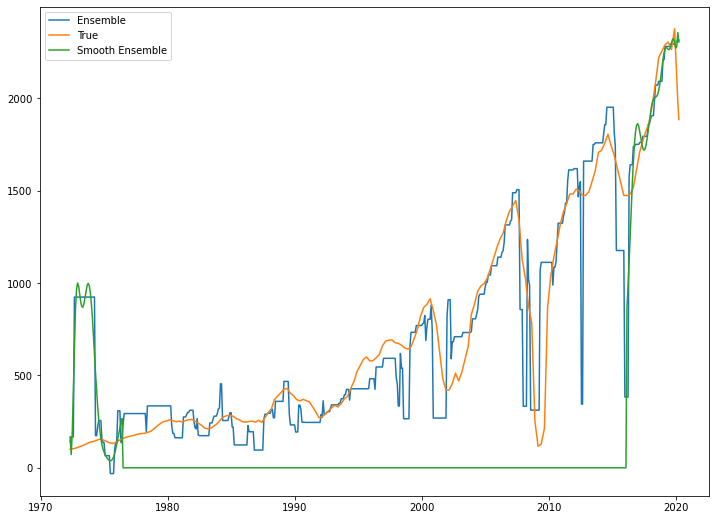

In [29]:
plt.figure(figsize = (12,9))
plt.plot(df['SP500-EPS-Ensemble-Pred'], label = 'Ensemble')
plt.plot(df['SP500-EPS-Index'], label = 'True')
plt.plot(df['SP500-EPS-Ensemble-Pred-Smth'], label = 'Smooth Ensemble')
plt.legend()